# Pymaceuticals Inc.
---

### Analysis

- Observing the Capomulin regimen, mice weight has a positive linear correlation with tummor size with an r^2 value of 0.84.
- Of the four regimens: "Capomulin, Ramicane, Infubinol, Ceftamin", Capomulin and Ramicane gave better results than Infubinol and Ceftamin (mice had smaller tumors).
- The distribution of male and female mice in the study was almost one to one with 49.6% of the mice being femaile and 50.4% of the mice being male.  
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [31]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated = merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint']),"Mouse ID"].unique()
duplicated

array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID.
merged_df.loc[merged_df['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df['Mouse ID'] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

In [47]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

groupby_df = clean_df.groupby(['Drug Regimen'])

mean = groupby_df['Tumor Volume (mm3)'].mean()
median = groupby_df['Tumor Volume (mm3)'].median()
variance = groupby_df['Tumor Volume (mm3)'].var()
std_dev = groupby_df['Tumor Volume (mm3)'].std()
sem = groupby_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume" : median,
    "Tumor Volume Variance" : variance,
    "Tumor Volume Std. Dev." : std_dev,
    "Tumor Volume Std. Err." : sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

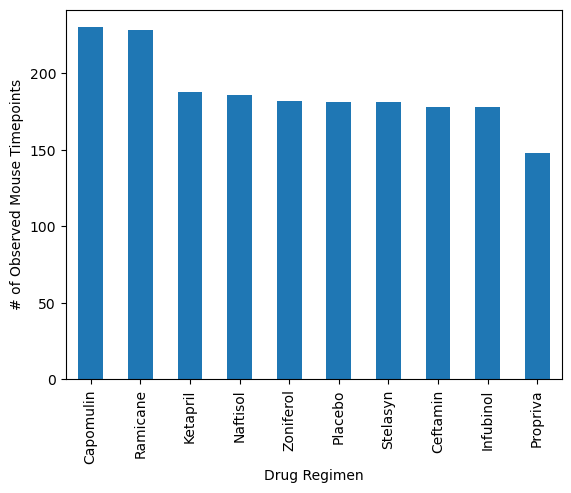

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_drug = clean_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False)
rows_per_drug.plot(kind='bar',ylabel='# of Observed Mouse Timepoints')

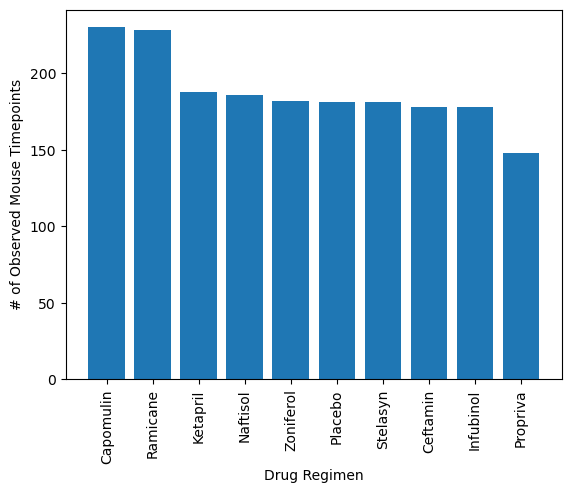

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(rows_per_drug.index,rows_per_drug.values)
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

In [83]:
gender = clean_df.groupby(['Sex'])['Mouse ID'].nunique()
gender

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

<Axes: title={'center': 'Male vs Female Pie Chart'}, ylabel='Mouse ID'>

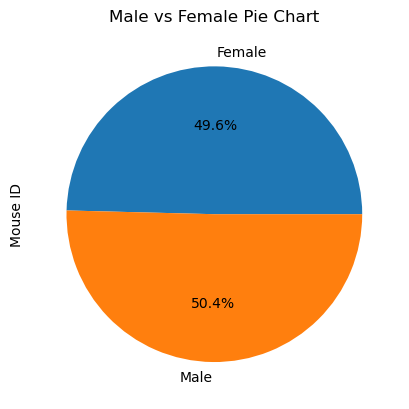

In [89]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_df.groupby(['Sex'])['Mouse ID'].nunique()

# Make the pie chart
gender.plot(kind='pie',title="Male vs Female Pie Chart",autopct='%1.1f%%')

Text(0.5, 1.0, 'Male vs Female Pie Chart')

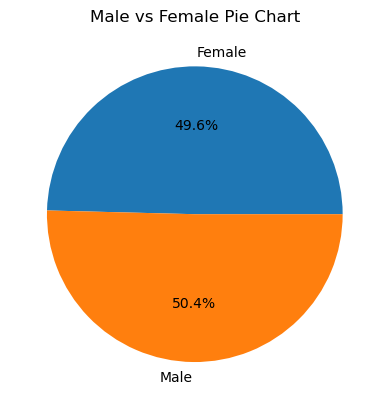

In [92]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plt.pie(gender, labels=('Female', 'Male'), autopct='%1.1f%%')
plt.title('Male vs Female Pie Chart')

## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_df.groupby(["Drug Regimen","Mouse ID"])['Timepoint'].max()
greatest_tp_df = pd.DataFrame(greatest_tp)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tp_df = pd.merge(greatest_tp_df, clean_df, on=('Drug Regimen', 'Mouse ID', 'Timepoint'), how='left')
greatest_tp_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume_df = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)

    # add subset
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
    print(f"Outlier: {(outliers)}")

Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


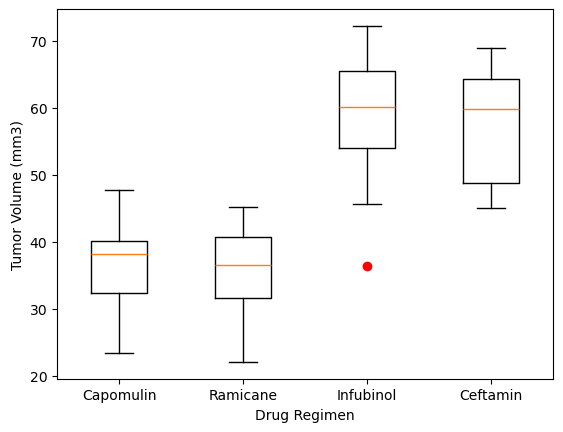

In [126]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
outliers = dict(markerfacecolor="r", markeredgecolor="r")
figure, sub = plt.subplots()
sub.boxplot(tumor_vol, flierprops=outliers)
sub.set_xlabel("Drug Regimen")
sub.set_ylabel("Tumor Volume (mm3)")
sub.xaxis.set(ticklabels=treatments)
plt.show()

## Line and Scatter Plots

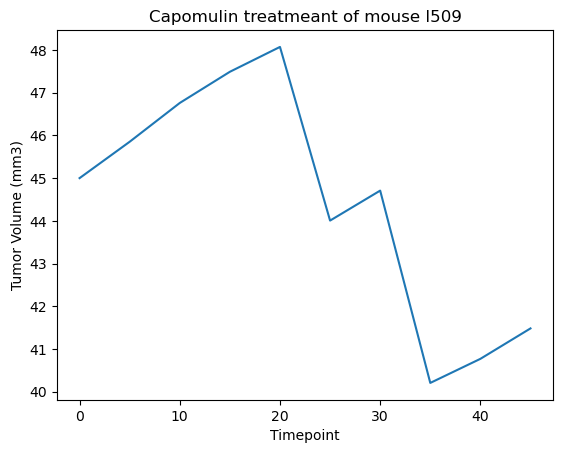

In [129]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df

time = line_df["Timepoint"]
vol = line_df["Tumor Volume (mm3)"] 

plt.figure()
line = plt.plot(time, vol)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")
plt.show()

C:\Users\Jake\AppData\Local\Temp\ipykernel_13448\2261499006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_df['Weight (g)'] = pd.to_numeric(scatter_df['Weight (g)'], errors='coerce')
C:\Users\Jake\AppData\Local\Temp\ipykernel_13448\2261499006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_df['Tumor Volume (mm3)'] = pd.to_numeric(scatter_df['Tumor Volume (mm3)'], errors='coerce')


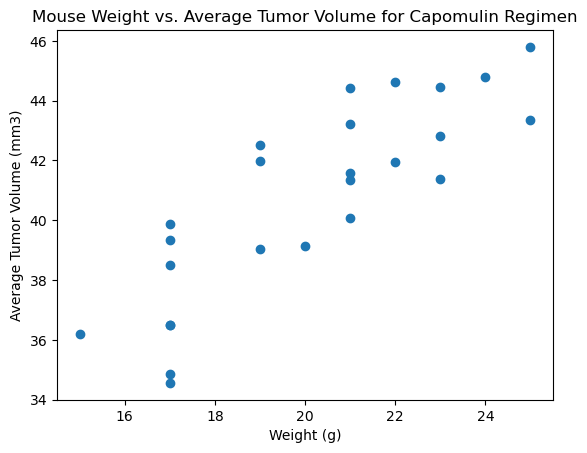

In [140]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame for Capomulin regimen
scatter_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]

# Convert 'Weight (g)' and 'Tumor Volume (mm3)' to numeric types
scatter_df['Weight (g)'] = pd.to_numeric(scatter_df['Weight (g)'], errors='coerce')
scatter_df['Tumor Volume (mm3)'] = pd.to_numeric(scatter_df['Tumor Volume (mm3)'], errors='coerce')

# Calculate the average weight and tumor volume for each mouse
avg_vol = scatter_df.groupby(['Mouse ID']).agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Create the scatter plot
plt.figure()
plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()

## Correlation and Regression

In [141]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation=round(st.pearsonr(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [ ]:
# Use Linear regression model to find slope and intercept
lin_reg=st.linregress(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
lin_reg

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

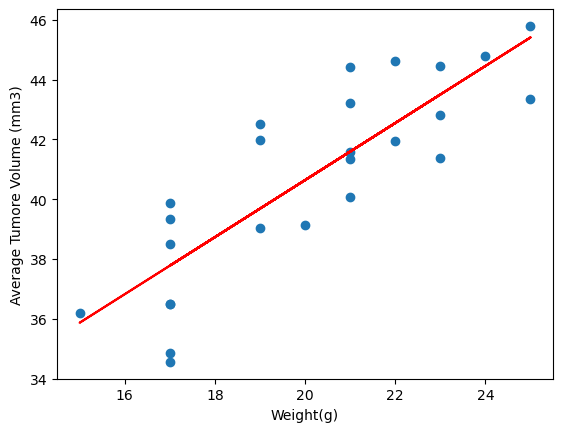

In [ ]:
# Use slope and intercept to form linear line equation
slope=0.9544396890241049 
intercept=21.552160532685008
line = slope*(avg_vol['Weight (g)'])+intercept

# Plot
plt.figure()
plt.plot(avg_vol['Weight (g)'], line,'r')
plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()